<a href="https://colab.research.google.com/github/waigani64/Chemical-Modeling/blob/main/DLVO_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

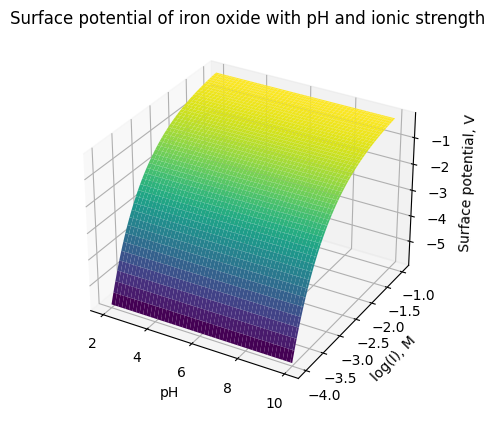

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
e = 1.60217662e-19  # Elementary charge, C
k = 1.38064852e-23  # Boltzmann constant, J/K
eps0 = 8.85418782e-12  # Vacuum permittivity, F/m
A = 2.8e-20  # Hamaker constant, J
z = -0.038  # Surface charge density, C/m^2
espr = 78.5  # Relative permittivity of the solvent

# pH range
pH = np.linspace(2, 10, 100)

# Ionic strength range
I = np.logspace(-4, -1, 100)  # M
kappa = np.sqrt(2 * I * 1000 * e**2 / (eps0 * k * 298))  # Debye-Huckel parameter, 1/m

# Surface potential calculation
pH_mesh, I_mesh = np.meshgrid(pH, I)
phi = np.zeros_like(pH_mesh)
for i in range(len(pH)):
    for j in range(len(I)):
        H = 10**(-pH[i])
        OH = 1e-14 / H
        epsr = espr - 0.0191 * pH[i]  # Relative permittivity of the solution
        phi[j,i] = z / (eps0 * epsr * kappa[j]) * (1 + (1 + kappa[j] * A / 12 / np.pi / eps0 / z**2)**0.5)**2 - k * 298 / e * np.log(H / 1e-7)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(pH_mesh, np.log10(I_mesh), phi, cmap='viridis')
ax.set_xlabel('pH')
ax.set_ylabel('log(I), M')
ax.set_zlabel('Surface potential, V')
ax.set_title('Surface potential of iron oxide with pH and ionic strength')
plt.show()


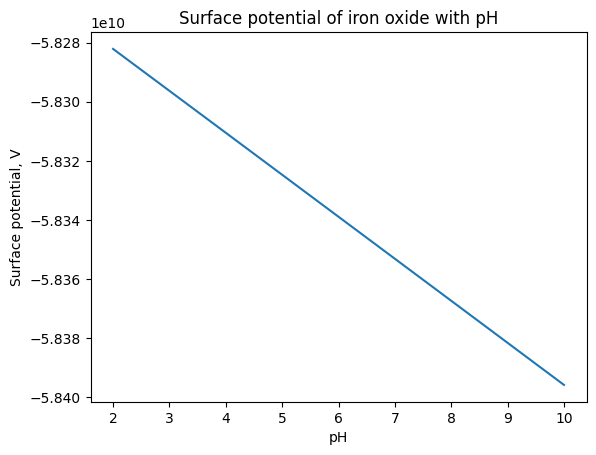

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1.60217662e-19  # Elementary charge, C
k = 1.38064852e-23  # Boltzmann constant, J/K
eps0 = 8.85418782e-12  # Vacuum permittivity, F/m
A = 2.8e-20  # Hamaker constant, J
z = -0.038  # Surface charge density, C/m^2
espr = 78.5  # Relative permittivity of the solvent

# Ionic strength
I = 0.01  # M
kappa = np.sqrt(2 * I * 1000 * e**2 / (eps0 * k * 298))  # Debye-Huckel parameter, 1/m

# pH range
pH = np.linspace(2, 10, 100)

# Surface potential calculation
phi = np.zeros_like(pH)
for i in range(len(pH)):
    H = 10**(-pH[i])
    OH = 1e-14 / H
    epsr = espr - 0.0191 * pH[i]  # Relative permittivity of the solution
    phi[i] = z / (eps0 * epsr * kappa) * (1 + (1 + kappa * A / 12 / np.pi / eps0 / z**2)**0.5)**2 - k * 298 / e * np.log(H / 1e-7)

# Plotting
plt.plot(pH, phi)
plt.xlabel('pH')
plt.ylabel('Surface potential, V')
plt.title('Surface potential of iron oxide with pH')
plt.show()
